# 1(1). EDA

### Imports

In [1]:
# for read data
import os

# for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import warnings; warnings.filterwarnings("ignore")

# for save data
import pickle

### Read Data

In [2]:
path = (os.path.abspath("./input"))
train = pd.read_csv(path + '/X_train_IDC.csv', encoding='cp949')
test = pd.read_csv(path + '/X_test_IDC.csv', encoding='cp949')
y_train = pd.read_csv(path + '/y_train.csv')

## ▶ Summary
- custid: 고객아이디
- sales_month, sales_day, sales_time, sales_dayofweek: 판매월, 판매일, 판매시간, 판매요일
- str_nm: 지점명
- goodcd, brd_nm, import_flg, pc_name, corner_nm: 상품코드, 브랜드 이름, 수입품여부, 상품군이름, 코너이름
- part_nm, team_nm, buyer_nm:	상품관리파트이름, 상품관리팀이름, 바이어이름
- tot_amt, dis_amt, net_amt: 구매금액, 할인금액, 실구매액
- inst_mon, inst_fee: 할부개월, 무이자할부여부

In [3]:
eda = pd.merge(train, y_train, on='custid', how='outer')
eda.head()

,custid,sales_month,sales_day,sales_dayofweek,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,...,inst_mon,inst_fee,REAL_PURCHASE,DISCOUNT,DISCOUNT_PER,REFUND,REFUND_AMT,IMPORT_AMT,INSTFEE_AMT,group
0,0,6,25,일,1212,무역점,2116050008000,에스티로더,수입종합화장품,화장품,...,3,0,1,1,0.1,0,0,81000.0,0.0,M30
1,0,6,25,일,1242,무역점,4125440008000,시슬리,수입종합화장품,화장품,...,1,0,1,1,0.1,0,0,35100.0,0.0,M30
2,0,8,26,토,1810,본점,2116052008000,크리니크,수입종합화장품,화장품,...,3,0,1,1,0.1,0,0,157500.0,0.0,M30
3,0,8,26,토,1830,본점,4106430119900,듀퐁,수입의류,명품토탈,...,3,0,1,1,0.1,0,0,409500.0,0.0,M30
4,0,9,3,일,1802,무역점,2139141008000,랑콤,수입종합화장품,화장품,...,3,0,1,1,0.1,0,0,0.0,0.0,M30


## ▶ Simple Analysis

- **[sales_dayofweek]**

범주수: 7, Mean Encoding: 7


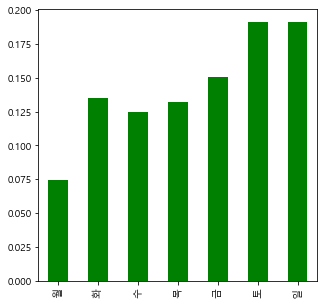

In [4]:
fe_sales_dayofweek = eda['sales_dayofweek'].value_counts(normalize=True)

print(f'범주수: {eda.sales_dayofweek.nunique()}, Mean Encoding: {fe_sales_dayofweek.nunique()}')
fe_sales_dayofweek.loc[list('월화수목금토일')].plot.bar(figsize=(5,5), color='green')
plt.show()

- **[str_nm]**

범주수: 4, Mean Encoding: 4


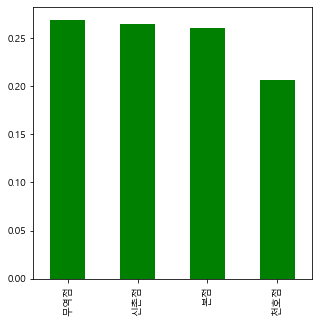

In [5]:
fe_str_nm = eda['str_nm'].value_counts(normalize=True)

print(f'범주수: {eda.str_nm.nunique()}, Mean Encoding: {fe_str_nm.nunique()}')
fe_str_nm.plot.bar(figsize=(5,5), color='green')
plt.show()

- **[brd_nm]**

In [6]:
# 범주수가 부족하다.
fe_brd_nm = eda['brd_nm'].value_counts(normalize=True)

print(f'범주수: {eda.brd_nm.nunique()}, Mean Encoding: {fe_brd_nm.nunique()}')

범주수: 1848, Mean Encoding: 590


- **[corner_nm]**

In [7]:
# 범주수가 부족하다.
fe_corner_nm = eda['corner_nm'].value_counts(normalize=True)

print(f'범주수: {eda.corner_nm.nunique()}, Mean Encoding: {fe_corner_nm.nunique()}')

범주수: 280, Mean Encoding: 261


- **[pc_nm]**

범주수: 65, Mean Encoding: 65


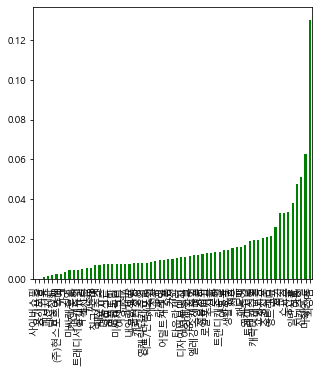

In [8]:
fe_pc_nm = eda['pc_nm'].value_counts(normalize=True)

print(f'범주수: {eda.pc_nm.nunique()}, Mean Encoding: {fe_pc_nm.nunique()}')
fe_pc_nm.sort_values().plot.bar(figsize=(5,5), color='green')
plt.show()

- **[part_nm]**

범주수: 23, Mean Encoding: 23


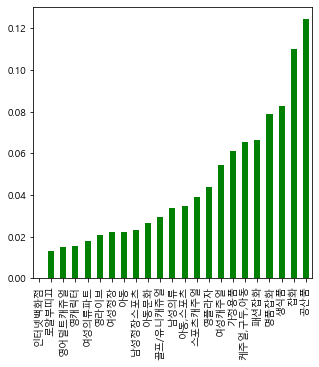

In [9]:
fe_part_nm = eda['part_nm'].value_counts(normalize=True)

print(f'범주수: {eda.part_nm.nunique()}, Mean Encoding: {fe_part_nm.nunique()}')
fe_part_nm.sort_values().plot.bar(figsize=(5,5), color='green')
plt.show()

- **[team_nm]**

범주수: 4, Mean Encoding: 4


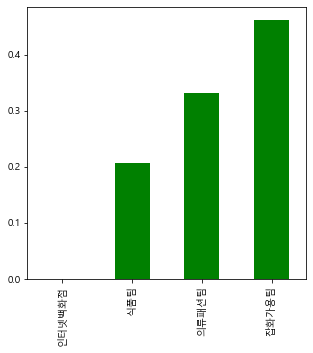

In [10]:
fe_team_nm = eda['team_nm'].value_counts(normalize=True)

print(f'범주수: {eda.team_nm.nunique()}, Mean Encoding: {fe_team_nm.nunique()}')
fe_team_nm.sort_values().plot.bar(figsize=(5,5), color='green')
plt.show()

- **[buyer_nm]**

범주수: 34, Mean Encoding: 34


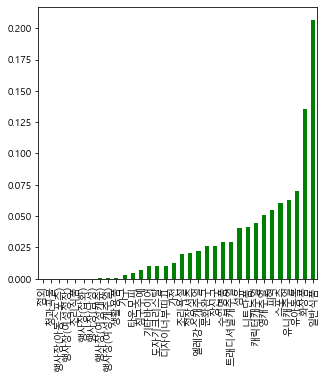

In [11]:
fe_buyer_nm = eda['buyer_nm'].value_counts(normalize=True)

print(f'범주수: {eda.buyer_nm.nunique()}, Mean Encoding: {fe_buyer_nm.nunique()}')
fe_buyer_nm.sort_values().plot.bar(figsize=(5,5), color='green')
plt.show()

- **[inst_mon]**<br>
  할부 개월의 value_counts 합이 총 데이터 수와 같다. 즉 주어진 고객들은 모두 할부를 사용했다,

In [12]:
eda.inst_mon.value_counts().sum() == eda.shape[0]

True

- **[실제 구매개수]**

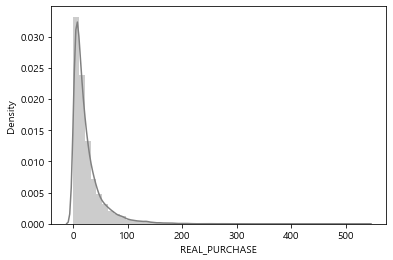

In [13]:
sns.distplot(eda.groupby('custid')['REAL_PURCHASE'].sum(), color='grey')
plt.show()

## ▶ Multiple Analysis

### $~~$ Group 분석

- **[goodcd와 group]**

In [14]:
# 최소 고객수 5%
min_customer = eda.custid.nunique()*0.05
count_customer = eda.drop_duplicates(['custid', 'goodcd']).goodcd.value_counts()
satisfy_customer = count_customer[count_customer>min_customer].index

In [15]:
goodcd = eda.query('goodcd in @satisfy_customer')

# group별 고객수, goodcd수 반영
goodcd_eda = pd.pivot_table(goodcd, index='goodcd', columns='group', values='net_amt', 
                         aggfunc=np.size, fill_value=0, margins=True)
goodcd_eda = goodcd_eda.divide(goodcd_eda['All'], axis=0)
goodcd_eda.loc['All'] = eda.drop_duplicates('custid').groupby('group').size().T
goodcd_eda = goodcd_eda.divide(goodcd_eda.loc['All'], axis=1).iloc[:-1, :-1]

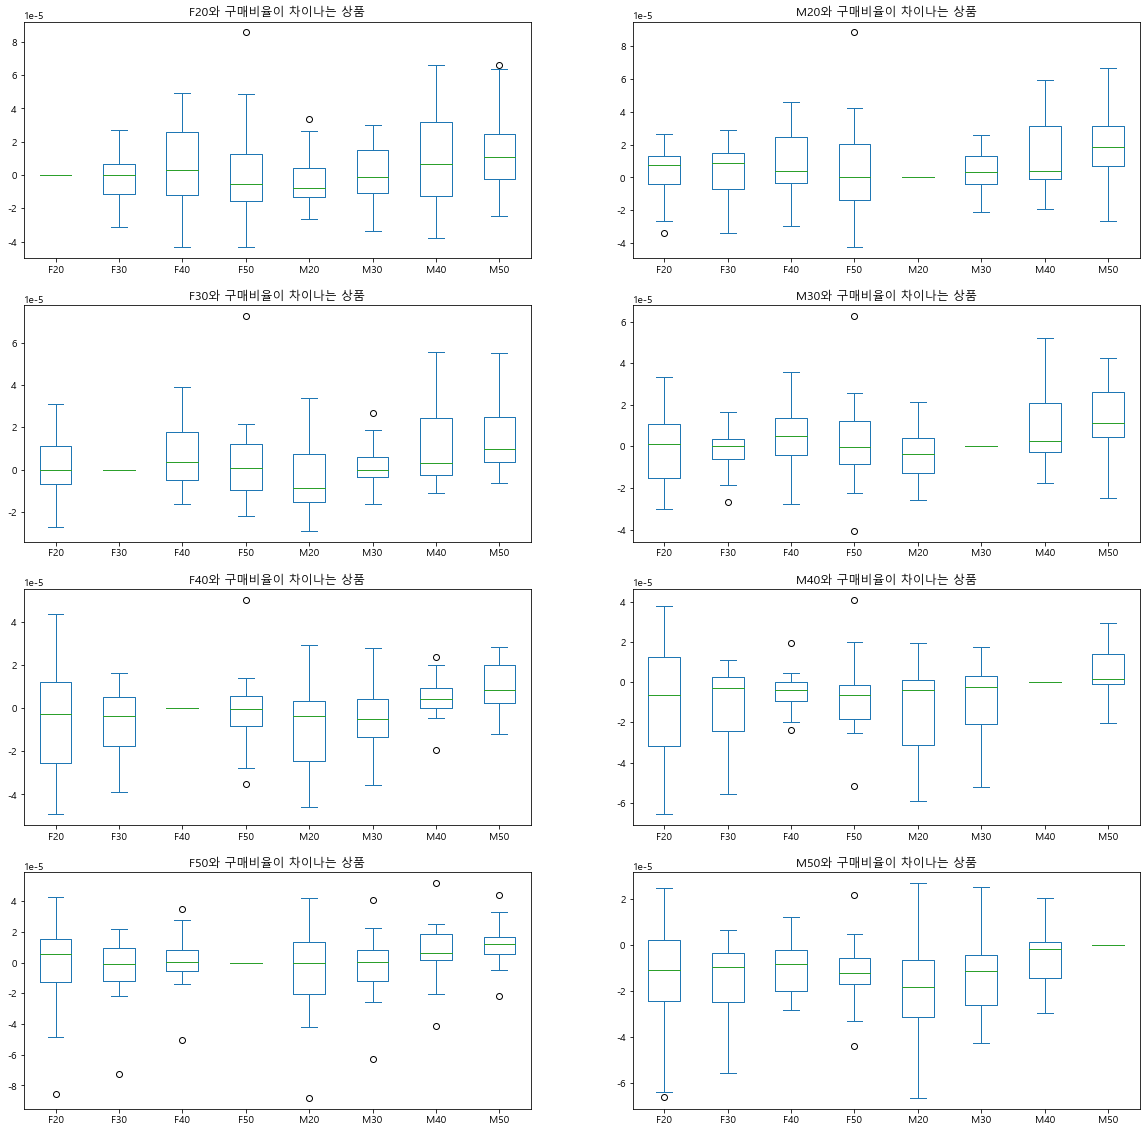

In [16]:
goodcdset = set()

fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for i in range(8):
    ease = goodcd_eda.sub(goodcd_eda[goodcd_eda.columns[i]], axis=0)
    ease.loc['q1'], ease.loc['q3'] = ease.quantile(0.25, axis=0), ease.quantile(0.75, axis=0)
    ease.loc['lower'] = ease.loc['q1']-1.5*(ease.loc['q3']-ease.loc['q1'])
    ease.loc['upper'] = ease.loc['q3']+1.5*(ease.loc['q3']-ease.loc['q1'])
    ease['diff'] = (ease < ease.loc['lower']).sum(axis=1) + (ease > ease.loc['upper']).sum(axis=1)
    goodcdset.update(ease.query('diff>=1').index.tolist())
    ease.iloc[:-4, :-1].plot.box(title=f'{goodcd_eda.columns[i]}와 구매비율이 차이나는 상품', ax=ax[i%4, i//4])

In [17]:
goodcd = eda.query('goodcd in @satisfy_customer')

# group별 고객수, goodcd수 반영
goodcd_eda = pd.pivot_table(goodcd, index='goodcd', columns='group', values='net_amt', 
                         aggfunc=np.mean, fill_value=0, margins=True)
goodcd_eda = goodcd_eda.divide(goodcd_eda['All'], axis=0)
goodcd_eda.loc['All'] = eda.drop_duplicates('custid').groupby('group').size().T
goodcd_eda = goodcd_eda.divide(goodcd_eda.loc['All'], axis=1).iloc[:-1, :-1]

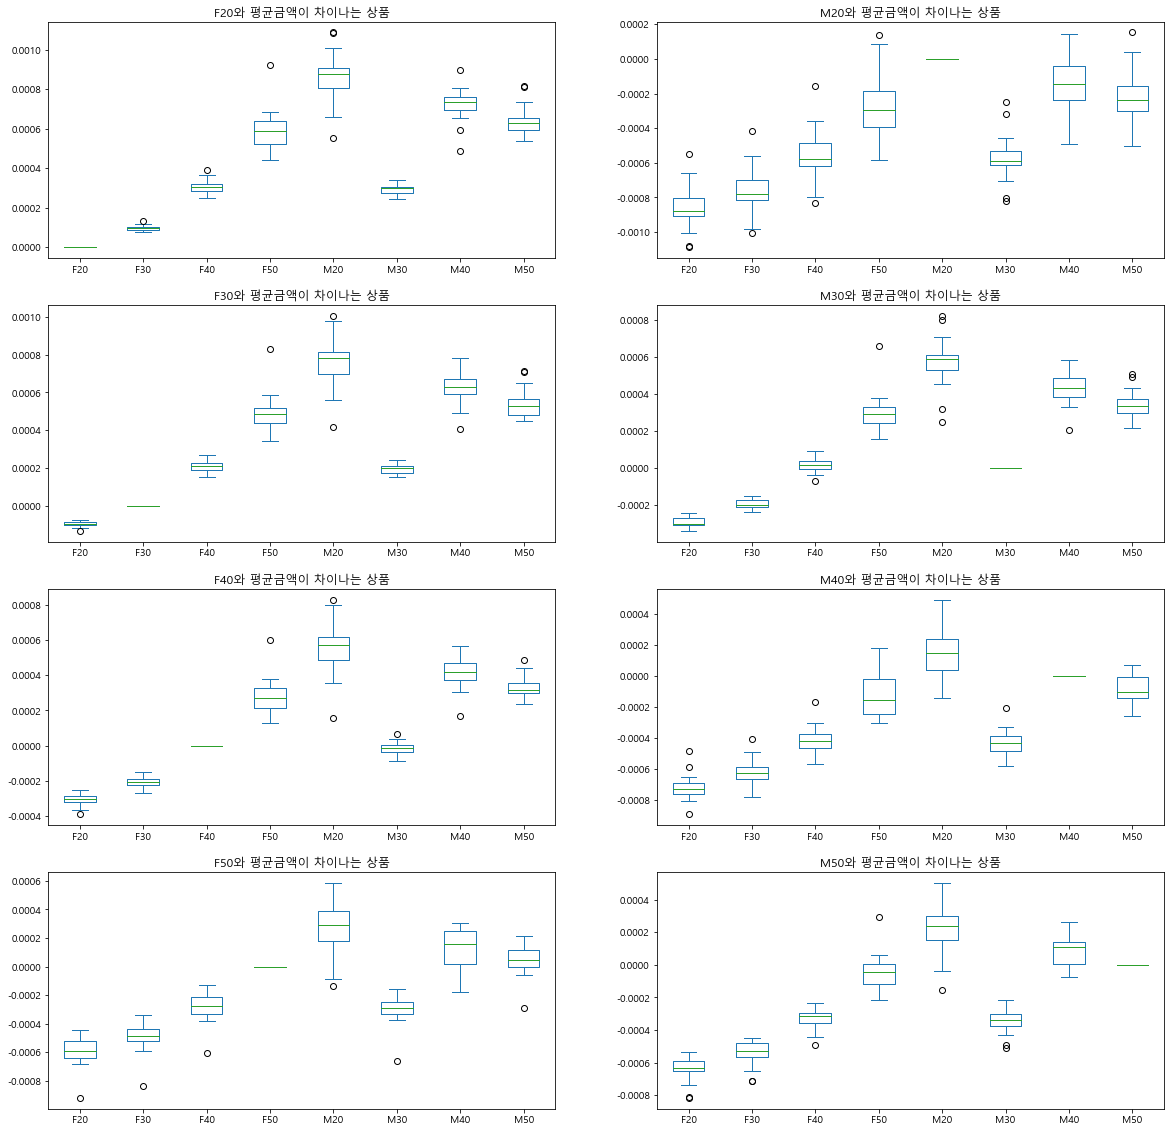

In [18]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for i in range(8):
    ease = goodcd_eda.sub(goodcd_eda[goodcd_eda.columns[i]], axis=0)
    ease.loc['q1'], ease.loc['q3'] = ease.quantile(0.25, axis=0), ease.quantile(0.75, axis=0)
    ease.loc['lower'] = ease.loc['q1']-1.5*(ease.loc['q3']-ease.loc['q1'])
    ease.loc['upper'] = ease.loc['q3']+1.5*(ease.loc['q3']-ease.loc['q1'])
    ease['diff'] = (ease < ease.loc['lower']).sum(axis=1) + (ease > ease.loc['upper']).sum(axis=1)
    goodcdset.update(ease.query('diff>=1').index.tolist())
    ease.iloc[:-4, :-1].plot.box(title=f'{goodcd_eda.columns[i]}와 평균금액이 차이나는 상품', ax=ax[i%4, i//4])

In [19]:
# outlier 확인
goodcdset

{2139140008300,
 2139143008000,
 2700000000000,
 4109160008000,
 4109161008000,
 4109310008000,
 4116051008300,
 4124180008000,
 4135140006900,
 4139141008000,
 4405580026000,
 4405620026000}

In [20]:
# Feature Engineering에 추가한다.
# eda.groupby('goodcd')['str_nm'].nunique().loc[goodcdset]
# eda.groupby('goodcd')['corner_nm'].nunique().loc[goodcdset]
# eda.groupby('goodcd')['pc_nm'].nunique().loc[goodcdset]
# eda.groupby('goodcd')['part_nm'].nunique().loc[goodcdset]
# eda.groupby('goodcd')['team_nm'].nunique().loc[goodcdset]
# eda.groupby('goodcd')['inst_mon'].nunique().loc[goodcdset]
# eda.groupby('goodcd')['inst_mon'].mean().loc[goodcdset]
# eda.groupby('goodcd')['inst_fee'].mean().loc[goodcdset]

- **[brd_nm와 group]**

In [21]:
min_customer = eda.custid.nunique()*0.05
count_customer = eda.drop_duplicates(['custid', 'brd_nm']).brd_nm.value_counts()
satisfy_customer = count_customer[count_customer>min_customer].index

In [22]:
brd_nm = eda.query('brd_nm in @satisfy_customer')

# group별 고객수, brd_nm수 반영
brd_nm_eda = pd.pivot_table(brd_nm, index='brd_nm', columns='group', values='net_amt', 
                         aggfunc=np.size, fill_value=0, margins=True)
brd_nm_eda = brd_nm_eda.divide(brd_nm_eda['All'], axis=0)
brd_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('group').size().T
brd_nm_eda = brd_nm_eda.divide(brd_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]

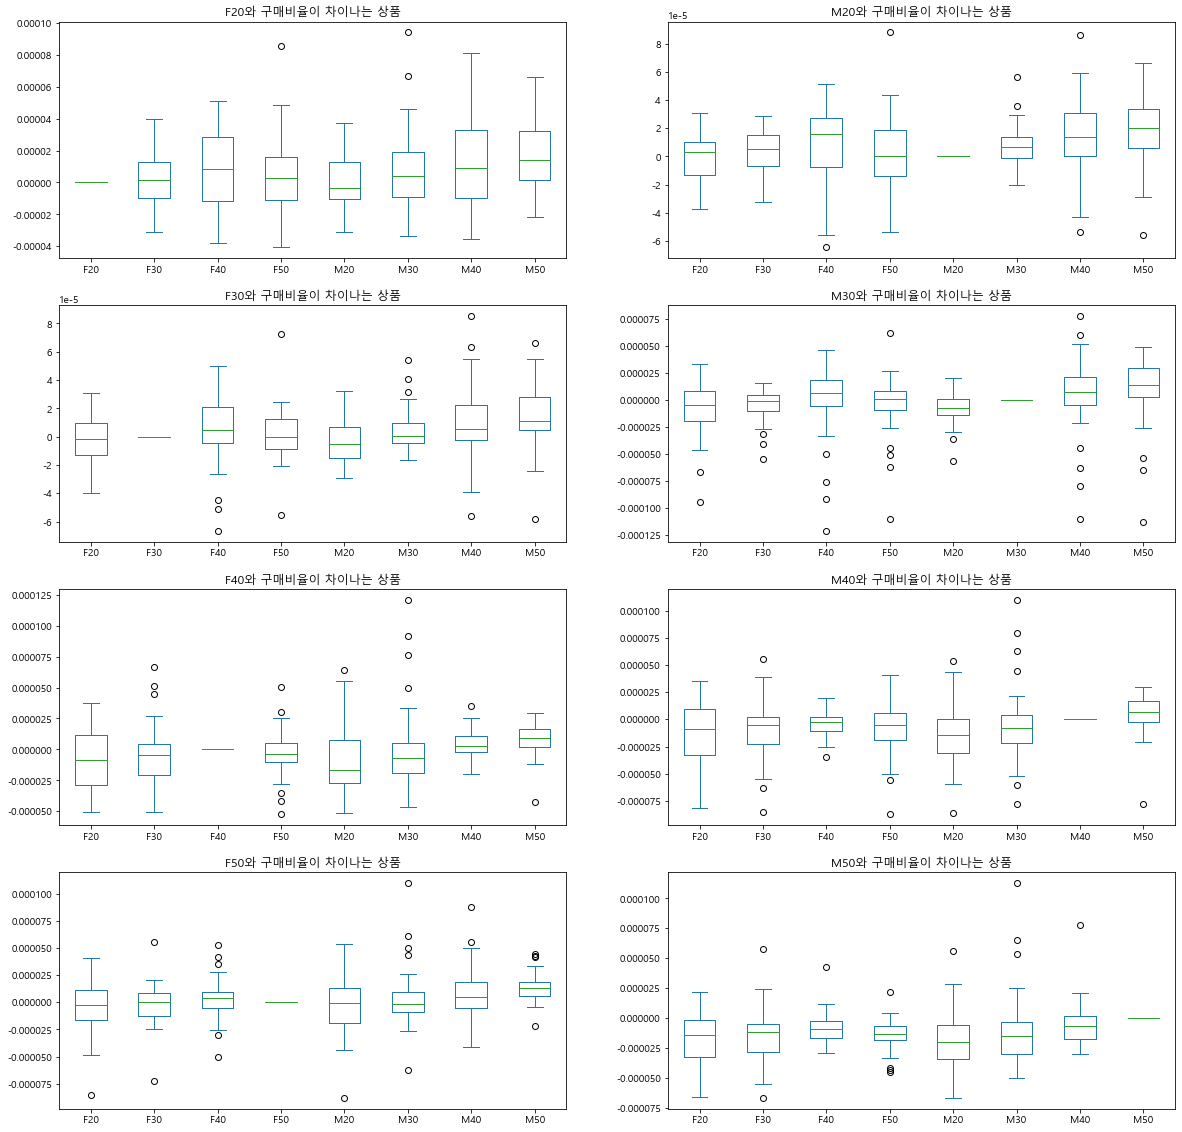

In [23]:
brd_nmset = set()

fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for i in range(8):
    ease = brd_nm_eda.sub(brd_nm_eda[brd_nm_eda.columns[i]], axis=0)
    ease.loc['q1'], ease.loc['q3'] = ease.quantile(0.25, axis=0), ease.quantile(0.75, axis=0)
    ease.loc['lower'] = ease.loc['q1']-1.5*(ease.loc['q3']-ease.loc['q1'])
    ease.loc['upper'] = ease.loc['q3']+1.5*(ease.loc['q3']-ease.loc['q1'])
    ease['diff'] = (ease < ease.loc['lower']).sum(axis=1) + (ease > ease.loc['upper']).sum(axis=1)
    brd_nmset.update(ease.query('diff>=1').index.tolist())
    ease.iloc[:-4, :-1].plot.box(title=f'{brd_nm_eda.columns[i]}와 구매비율이 차이나는 상품', ax=ax[i%4, i//4])

In [24]:
brd_nm = eda.query('brd_nm in @satisfy_customer')

# group별 고객수, brd_nm수 반영
brd_nm_eda = pd.pivot_table(brd_nm, index='brd_nm', columns='group', values='net_amt', 
                         aggfunc=np.mean, fill_value=0, margins=True)
brd_nm_eda = brd_nm_eda.divide(brd_nm_eda['All'], axis=0)
brd_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('group').size().T
brd_nm_eda = brd_nm_eda.divide(brd_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]

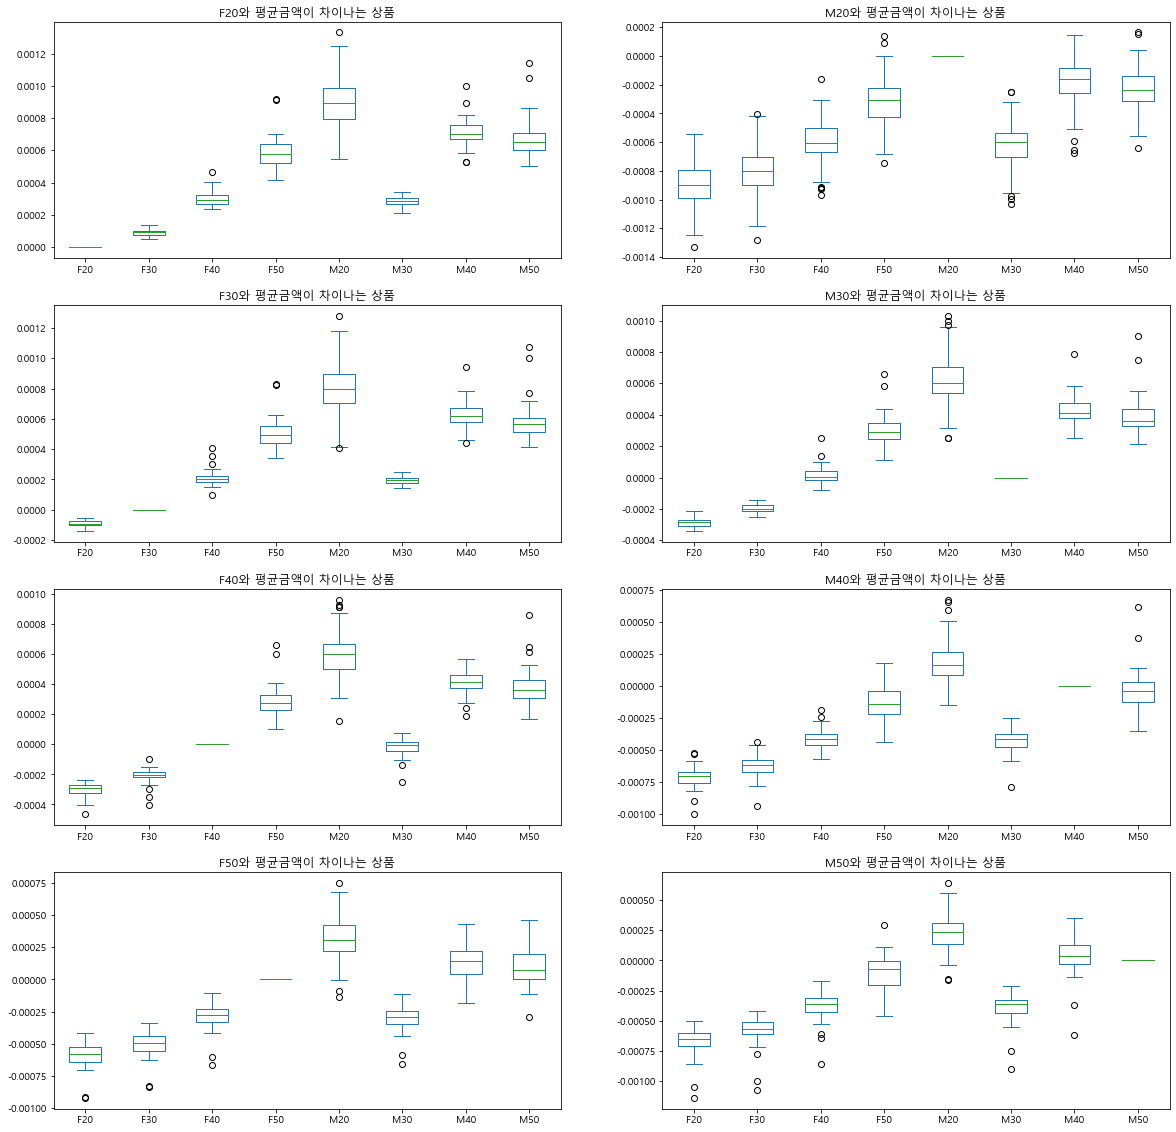

In [25]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for i in range(8):
    ease = brd_nm_eda.sub(brd_nm_eda[brd_nm_eda.columns[i]], axis=0)
    ease.loc['q1'], ease.loc['q3'] = ease.quantile(0.25, axis=0), ease.quantile(0.75, axis=0)
    ease.loc['lower'] = ease.loc['q1']-1.5*(ease.loc['q3']-ease.loc['q1'])
    ease.loc['upper'] = ease.loc['q3']+1.5*(ease.loc['q3']-ease.loc['q1'])
    ease['diff'] = (ease < ease.loc['lower']).sum(axis=1) + (ease > ease.loc['upper']).sum(axis=1)
    brd_nmset.update(ease.query('diff>=1').index.tolist())
    ease.iloc[:-4, :-1].plot.box(title=f'{brd_nm_eda.columns[i]}와 평균금액이 차이나는 상품', ax=ax[i%4, i//4])

In [26]:
# outlier 확인
brd_nmset

{'NUK',
 '겔랑',
 '닥스',
 '리바이스',
 '비오뗌',
 '쇼콜라',
 '스포트리플레이',
 '시세이도',
 '시스템',
 '아가방',
 '아라미스',
 '올리비에',
 '지오다노',
 '퀵실버',
 '크리스챤디올화장품',
 '파코라반',
 '폴로',
 '폴로화장품'}

In [27]:
# Feature Engineering에 추가한다.
# eda.groupby('brd_nm')['str_nm'].nunique().loc[brd_nmset]
# eda.groupby('brd_nm')['goodcd'].nunique().loc[brd_nmset]
# eda.groupby('brd_nm')['corner_nm'].nunique().loc[brd_nmset]
# eda.groupby('brd_nm')['pc_nm'].nunique().loc[brd_nmset]
# eda.groupby('brd_nm')['part_nm'].nunique().loc[brd_nmset]
# eda.groupby('brd_nm')['team_nm'].nunique().loc[brd_nmset]
# eda.groupby('brd_nm')['buyer_nm'].nunique().loc[brd_nmset]
# eda.groupby('brd_nm')['inst_mon'].nunique().loc[brd_nmset]
# eda.groupby('brd_nm')['inst_mon'].mean().loc[brd_nmset]
# eda.groupby('brd_nm')['inst_fee'].mean().loc[brd_nmset]

- **[corner_nm와 group]**

In [28]:
min_customer = eda.custid.nunique()*0.05
count_customer = eda.drop_duplicates(['custid', 'corner_nm']).corner_nm.value_counts()
satisfy_customer = set(count_customer[count_customer>min_customer].index)

In [29]:
corner_nm = eda.query('corner_nm in @satisfy_customer')

# group별 고객수, corner_nm수 반영
corner_nm_eda = pd.pivot_table(corner_nm, index='corner_nm', columns='group', values='net_amt', 
                         aggfunc=np.size, fill_value=0, margins=True)
corner_nm_eda = corner_nm_eda.divide(corner_nm_eda['All'], axis=0)
corner_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('group').size().T
corner_nm_eda = corner_nm_eda.divide(corner_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]

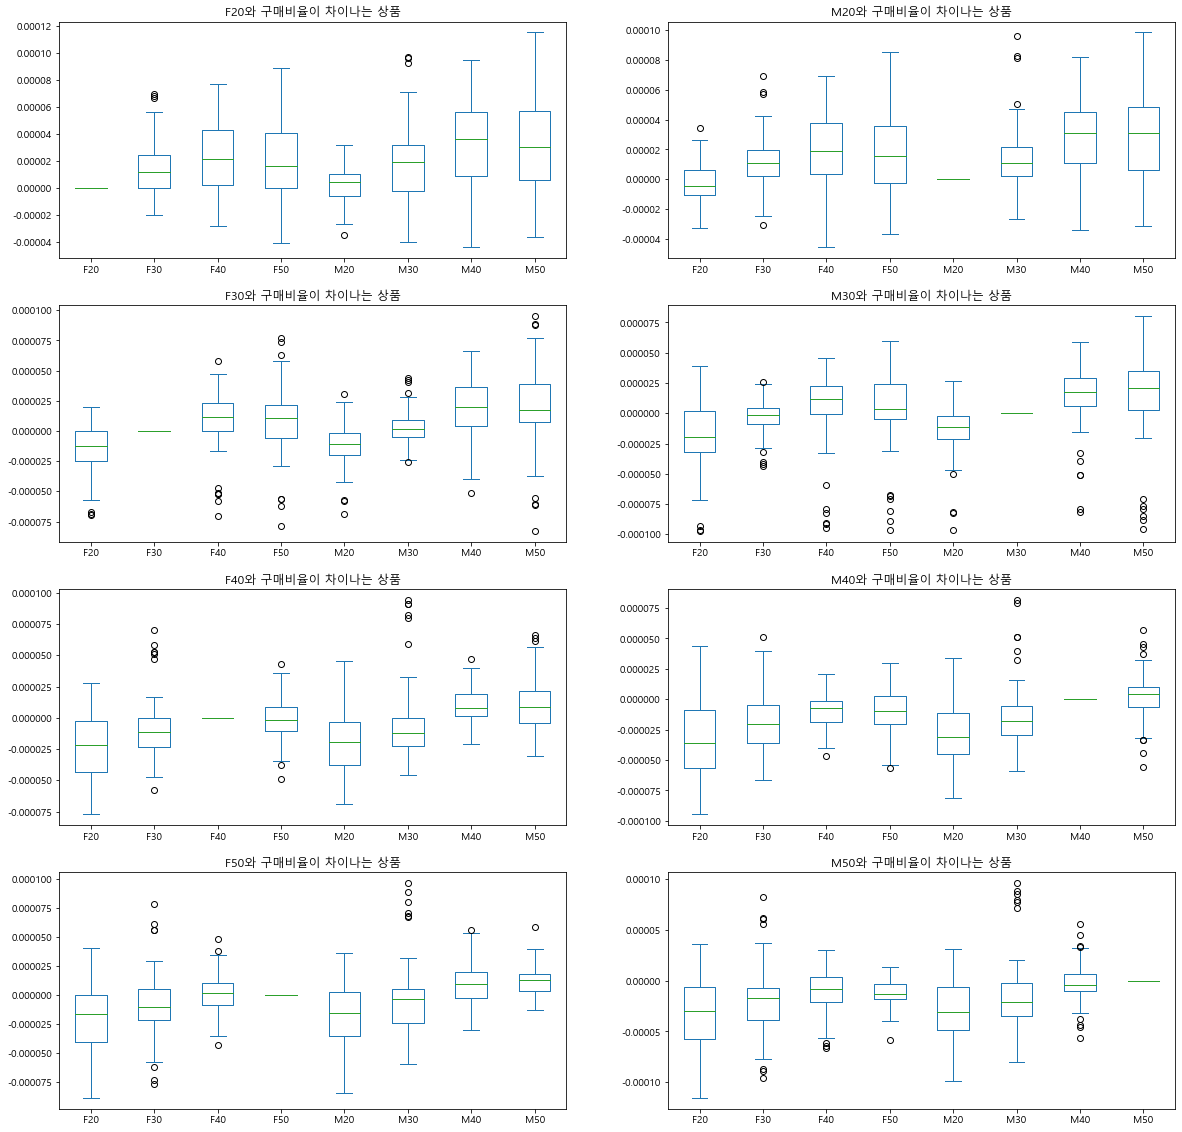

In [30]:
corner_nmset = set()

fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for i in range(8):
    ease = corner_nm_eda.sub(corner_nm_eda[corner_nm_eda.columns[i]], axis=0)
    ease.loc['q1'], ease.loc['q3'] = ease.quantile(0.25, axis=0), ease.quantile(0.75, axis=0)
    ease.loc['lower'] = ease.loc['q1']-1.5*(ease.loc['q3']-ease.loc['q1'])
    ease.loc['upper'] = ease.loc['q3']+1.5*(ease.loc['q3']-ease.loc['q1'])
    ease['diff'] = (ease < ease.loc['lower']).sum(axis=1) + (ease > ease.loc['upper']).sum(axis=1)
    corner_nmset.update(ease.query('diff>=1').index.tolist())
    ease.iloc[:-4, :-1].plot.box(title=f'{corner_nm_eda.columns[i]}와 구매비율이 차이나는 상품', ax=ax[i%4, i//4])

In [31]:
corner_nm = eda.query('corner_nm in @satisfy_customer')

# group별 고객수, corner_nm수 반영
corner_nm_eda = pd.pivot_table(corner_nm, index='corner_nm', columns='group', values='net_amt', 
                         aggfunc=np.mean, fill_value=0, margins=True)
corner_nm_eda = corner_nm_eda.divide(corner_nm_eda['All'], axis=0)
corner_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('group').size().T
corner_nm_eda = corner_nm_eda.divide(corner_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]

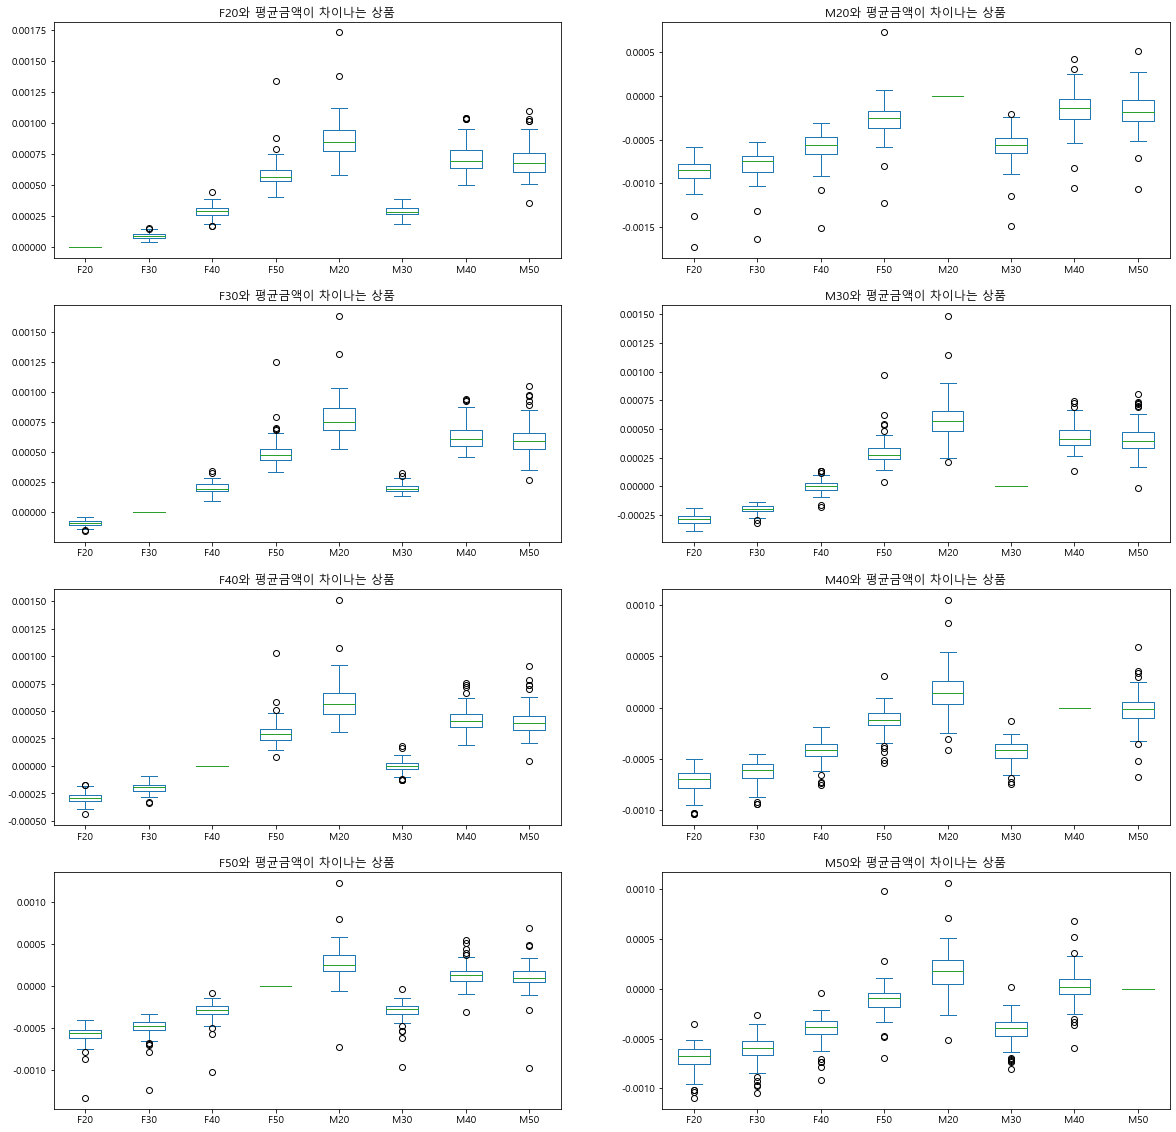

In [32]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for i in range(8):
    ease = corner_nm_eda.sub(corner_nm_eda[corner_nm_eda.columns[i]], axis=0)
    ease.loc['q1'], ease.loc['q3'] = ease.quantile(0.25, axis=0), ease.quantile(0.75, axis=0)
    ease.loc['lower'] = ease.loc['q1']-1.5*(ease.loc['q3']-ease.loc['q1'])
    ease.loc['upper'] = ease.loc['q3']+1.5*(ease.loc['q3']-ease.loc['q1'])
    ease['diff'] = (ease < ease.loc['lower']).sum(axis=1) + (ease > ease.loc['upper']).sum(axis=1)
    corner_nmset.update(ease.query('diff>=1').index.tolist())
    ease.iloc[:-4, :-1].plot.box(title=f'{corner_nm_eda.columns[i]}와 평균금액이 차이나는 상품', ax=ax[i%4, i//4])

In [33]:
# Outlier 확인
corner_nmset

{'건식품',
 '골프(국내)',
 '골프웨어',
 '내셔널',
 '뉴베이직캐주얼',
 '단품',
 '머플러',
 '문화',
 '미확인코너',
 '베이직캐주얼',
 '생선',
 '수입도자기',
 '수입부띠끄',
 '수입악세사리',
 '수입의류',
 '수입향수',
 '스타킹',
 '스포츠슈즈',
 '신생아',
 '아동',
 '아동복',
 '완구',
 '유아복',
 '일반조리',
 '정육',
 '준보석',
 '진캐주얼',
 '청과',
 '취사소형',
 '트레디셔널캐주얼',
 '트렌드캐주얼',
 '하이캐쥬얼'}

In [34]:
# Feature Engineering에 추가한다.
# eda.groupby('corner_nm')['str_nm'].nunique().loc[corner_nmset]
# eda.groupby('corner_nm')['goodcd'].nunique().loc[corner_nmset]
# eda.groupby('corner_nm')['brd_nm'].nunique().loc[corner_nmset]
# eda.groupby('corner_nm')['pc_nm'].nunique().loc[corner_nmset]
# eda.groupby('corner_nm')['part_nm'].nunique().loc[corner_nmset]
# eda.groupby('corner_nm')['team_nm'].nunique().loc[corner_nmset]
# eda.groupby('corner_nm')['buyer_nm'].nunique().loc[corner_nmset]
# eda.groupby('corner_nm')['import_flg'].nunique().loc[corner_nmset]
# eda.groupby('corner_nm')['inst_mon'].nunique().loc[corner_nmset]
# eda.groupby('corner_nm')['inst_mon'].mean().loc[corner_nmset]
# eda.groupby('corner_nm')['inst_fee'].mean().loc[corner_nmset]

- **[pc_nm와 group]**

In [35]:
min_customer = eda.custid.nunique()*0.05
count_customer = eda.drop_duplicates(['custid', 'pc_nm']).pc_nm.value_counts()
satisfy_customer = set(count_customer[count_customer>min_customer].index) 

In [36]:
pc_nm = eda.query('pc_nm in @satisfy_customer')

# group별 고객수, pc_nm수 반영
pc_nm_eda = pd.pivot_table(pc_nm, index='pc_nm', columns='group', values='net_amt', 
                         aggfunc=np.size, fill_value=0, margins=True)
pc_nm_eda = pc_nm_eda.divide(pc_nm_eda['All'], axis=0)
pc_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('group').size().T
pc_nm_eda = pc_nm_eda.divide(pc_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]

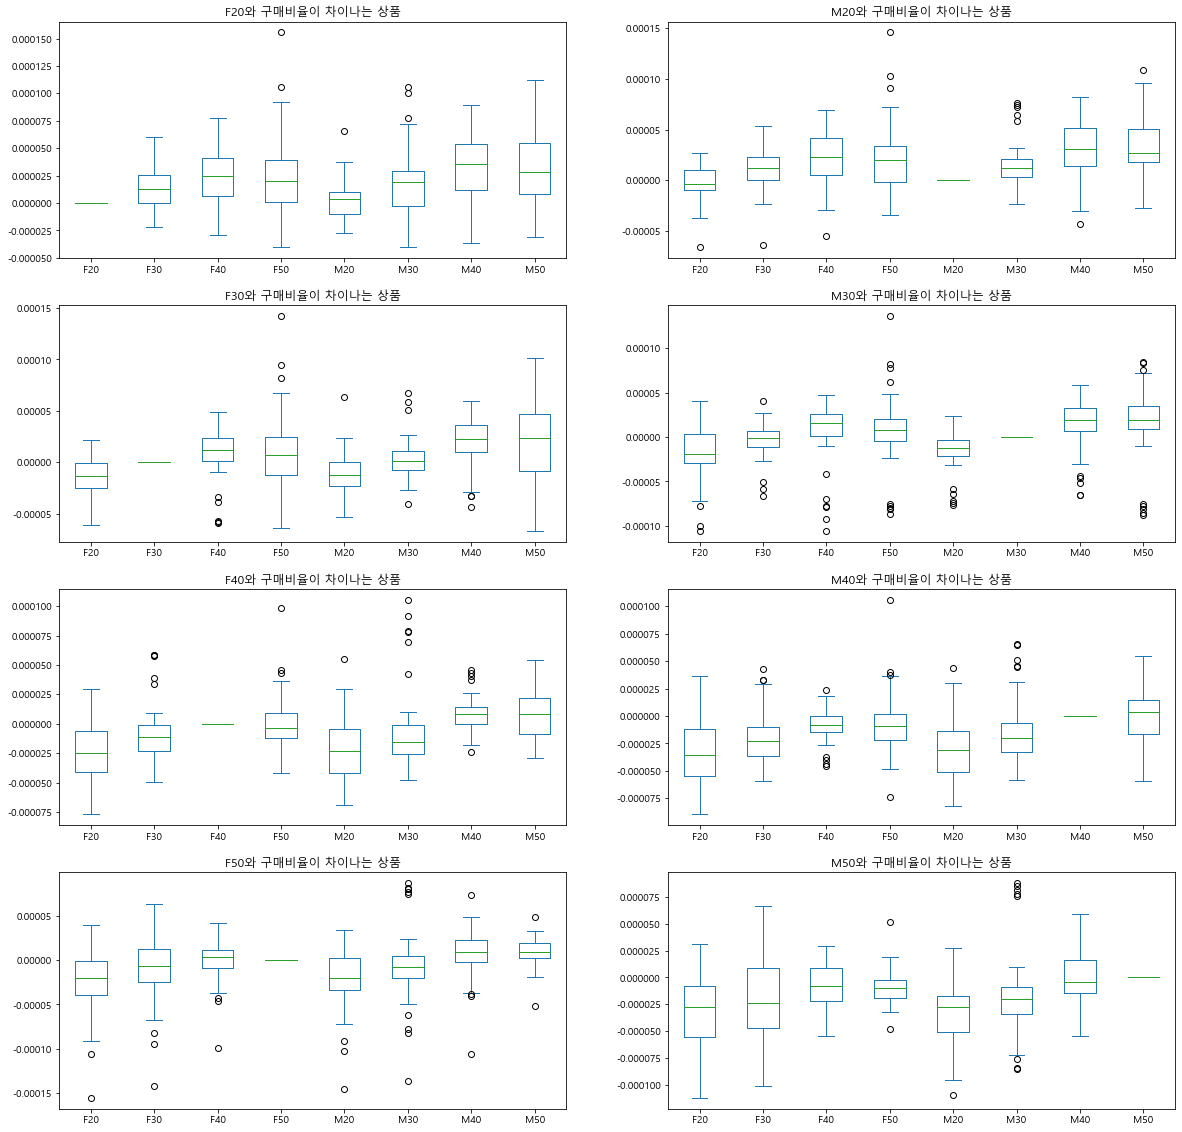

In [37]:
pc_nmset = set()

fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for i in range(8):
    ease = pc_nm_eda.sub(pc_nm_eda[pc_nm_eda.columns[i]], axis=0)
    ease.loc['q1'], ease.loc['q3'] = ease.quantile(0.25, axis=0), ease.quantile(0.75, axis=0)
    ease.loc['lower'] = ease.loc['q1']-1.5*(ease.loc['q3']-ease.loc['q1'])
    ease.loc['upper'] = ease.loc['q3']+1.5*(ease.loc['q3']-ease.loc['q1'])
    ease['diff'] = (ease < ease.loc['lower']).sum(axis=1) + (ease > ease.loc['upper']).sum(axis=1)
    pc_nmset.update(ease.query('diff>=1').index.tolist())
    ease.iloc[:-4, :-1].plot.box(title=f'{pc_nm_eda.columns[i]}와 구매비율이 차이나는 상품', ax=ax[i%4, i//4])

In [38]:
pc_nm = eda.query('pc_nm in @satisfy_customer')

# group별 고객수, pc_nm수 반영
pc_nm_eda = pd.pivot_table(pc_nm, index='pc_nm', columns='group', values='net_amt', 
                         aggfunc=np.mean, fill_value=0, margins=True)
pc_nm_eda = pc_nm_eda.divide(pc_nm_eda['All'], axis=0)
pc_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('group').size().T
pc_nm_eda = pc_nm_eda.divide(pc_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]

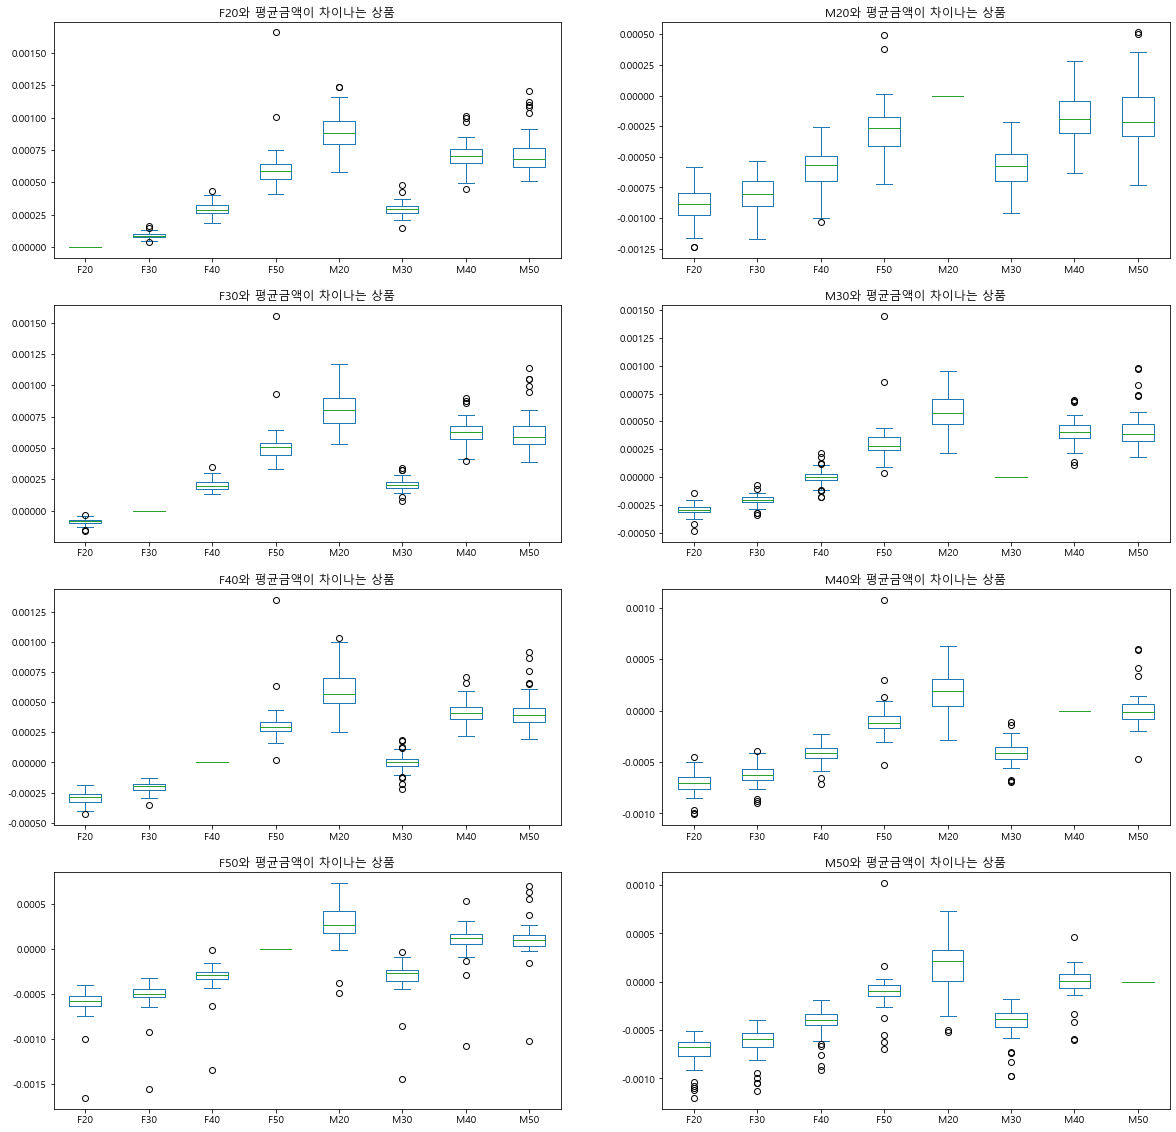

In [39]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for i in range(8):
    ease = pc_nm_eda.sub(pc_nm_eda[pc_nm_eda.columns[i]], axis=0)
    ease.loc['q1'], ease.loc['q3'] = ease.quantile(0.25, axis=0), ease.quantile(0.75, axis=0)
    ease.loc['lower'] = ease.loc['q1']-1.5*(ease.loc['q3']-ease.loc['q1'])
    ease.loc['upper'] = ease.loc['q3']+1.5*(ease.loc['q3']-ease.loc['q1'])
    ease['diff'] = (ease < ease.loc['lower']).sum(axis=1) + (ease > ease.loc['upper']).sum(axis=1)
    pc_nmset.update(ease.query('diff>=1').index.tolist())
    ease.iloc[:-4, :-1].plot.box(title=f'{pc_nm_eda.columns[i]}와 평균금액이 차이나는 상품', ax=ax[i%4, i//4])

In [40]:
# Outlier 확인
pc_nmset

{'가전',
 '가전/문화',
 '니트/단품/모피',
 '디자이너부띠끄',
 '로얄부띠끄',
 '명품토탈',
 '문화',
 '문화용품',
 '미씨캐주얼',
 '쇼핑보증',
 '수산물',
 '수입명품',
 '아동',
 '아동복',
 '악세사리',
 '영캐릭터캐쥬얼',
 '유아/완구',
 '장신구',
 '정장',
 '축산물',
 '캐릭터정장',
 '캐주얼'}

In [41]:
# Feature Engineering에 추가한다.
# eda.groupby('pc_nm')['str_nm'].nunique().loc[pc_nmset]
# eda.groupby('pc_nm')['goodcd'].nunique().loc[pc_nmset]
# eda.groupby('pc_nm')['brd_nm'].nunique().loc[pc_nmset]
# eda.groupby('pc_nm')['corner_nm'].nunique().loc[pc_nmset]
# eda.groupby('pc_nm')['part_nm'].nunique().loc[pc_nmset]
# eda.groupby('pc_nm')['team_nm'].nunique().loc[pc_nmset]
# eda.groupby('pc_nm')['buyer_nm'].nunique().loc[pc_nmset]
# eda.groupby('pc_nm')['import_flg'].nunique().loc[buyer_nmset]
# eda.groupby('pc_nm')['inst_mon'].nunique().loc[pc_nmset]
# eda.groupby('pc_nm')['inst_fee'].mean().loc[pc_nmset]

- **[part_nm와 group]**

In [42]:
min_customer = eda.custid.nunique()*0.05
count_customer = eda.drop_duplicates(['custid', 'part_nm']).part_nm.value_counts()
satisfy_customer = set(count_customer[count_customer>min_customer].index)

In [43]:
part_nm = eda.query('part_nm in @satisfy_customer')

# group별 고객수, part_nm수 반영
part_nm_eda = pd.pivot_table(part_nm, index='part_nm', columns='group', values='net_amt', 
                         aggfunc=np.size, fill_value=0, margins=True)
part_nm_eda = part_nm_eda.divide(part_nm_eda['All'], axis=0)
part_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('group').size().T
part_nm_eda = part_nm_eda.divide(part_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]

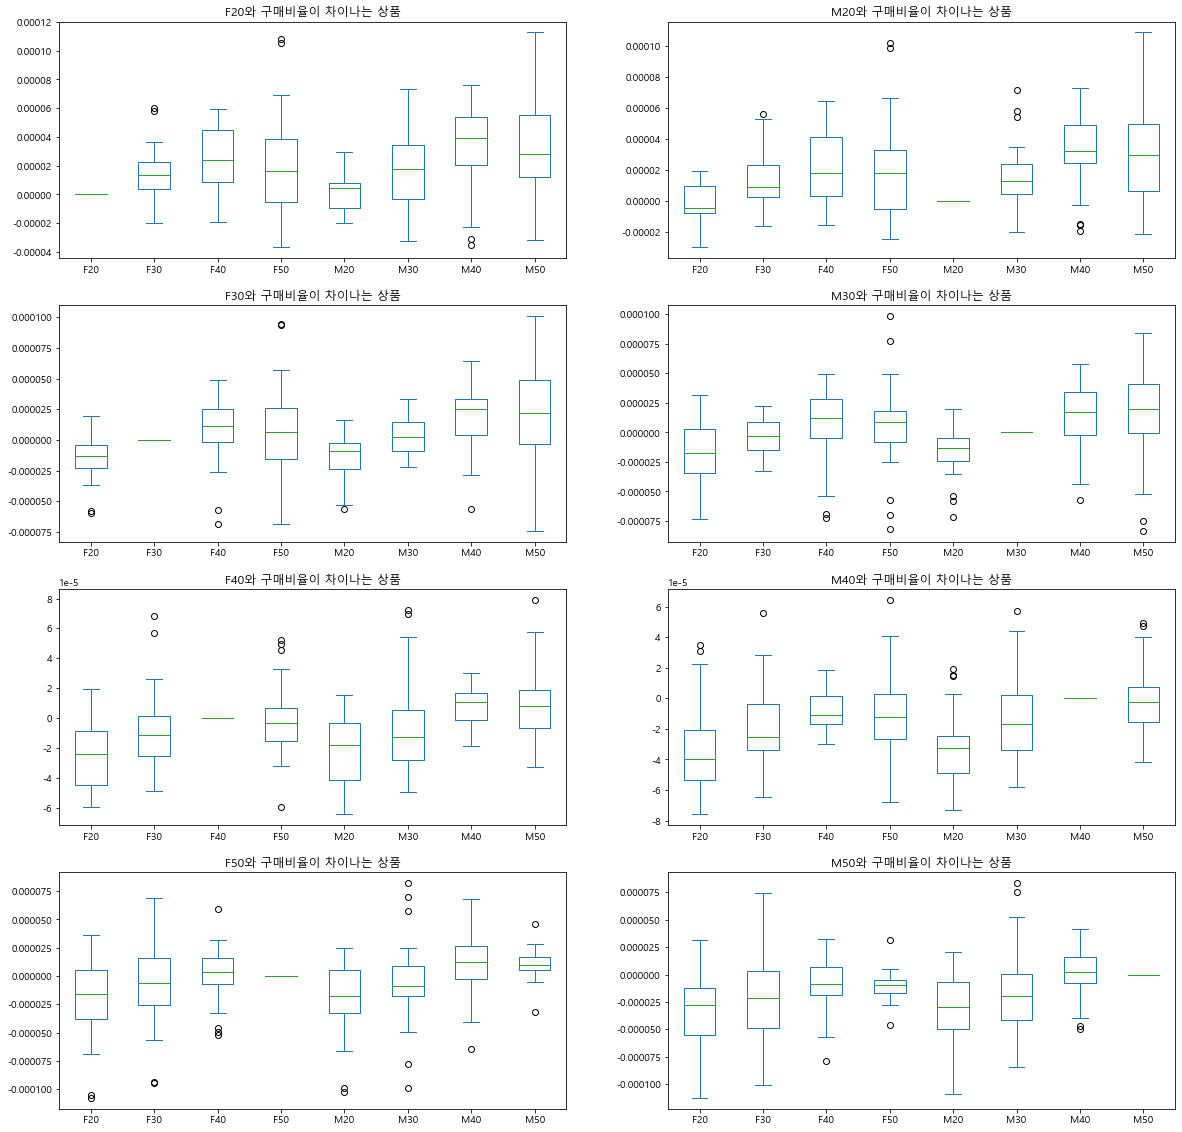

In [44]:
part_nmset = set()

fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for i in range(8):
    ease = part_nm_eda.sub(part_nm_eda[part_nm_eda.columns[i]], axis=0)
    ease.loc['q1'], ease.loc['q3'] = ease.quantile(0.25, axis=0), ease.quantile(0.75, axis=0)
    ease.loc['lower'] = ease.loc['q1']-1.5*(ease.loc['q3']-ease.loc['q1'])
    ease.loc['upper'] = ease.loc['q3']+1.5*(ease.loc['q3']-ease.loc['q1'])
    ease['diff'] = (ease < ease.loc['lower']).sum(axis=1) + (ease > ease.loc['upper']).sum(axis=1)
    part_nmset.update(ease.query('diff>=1').index.tolist())
    ease.iloc[:-4, :-1].plot.box(title=f'{part_nm_eda.columns[i]}와 구매비율이 차이나는 상품', ax=ax[i%4, i//4])

In [45]:
part_nm = eda.query('part_nm in @satisfy_customer')

# group별 고객수, part_nm수 반영
part_nm_eda = pd.pivot_table(part_nm, index='part_nm', columns='group', values='net_amt', 
                         aggfunc=np.mean, fill_value=0, margins=True)
part_nm_eda = part_nm_eda.divide(part_nm_eda['All'], axis=0)
part_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('group').size().T
part_nm_eda = part_nm_eda.divide(part_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]

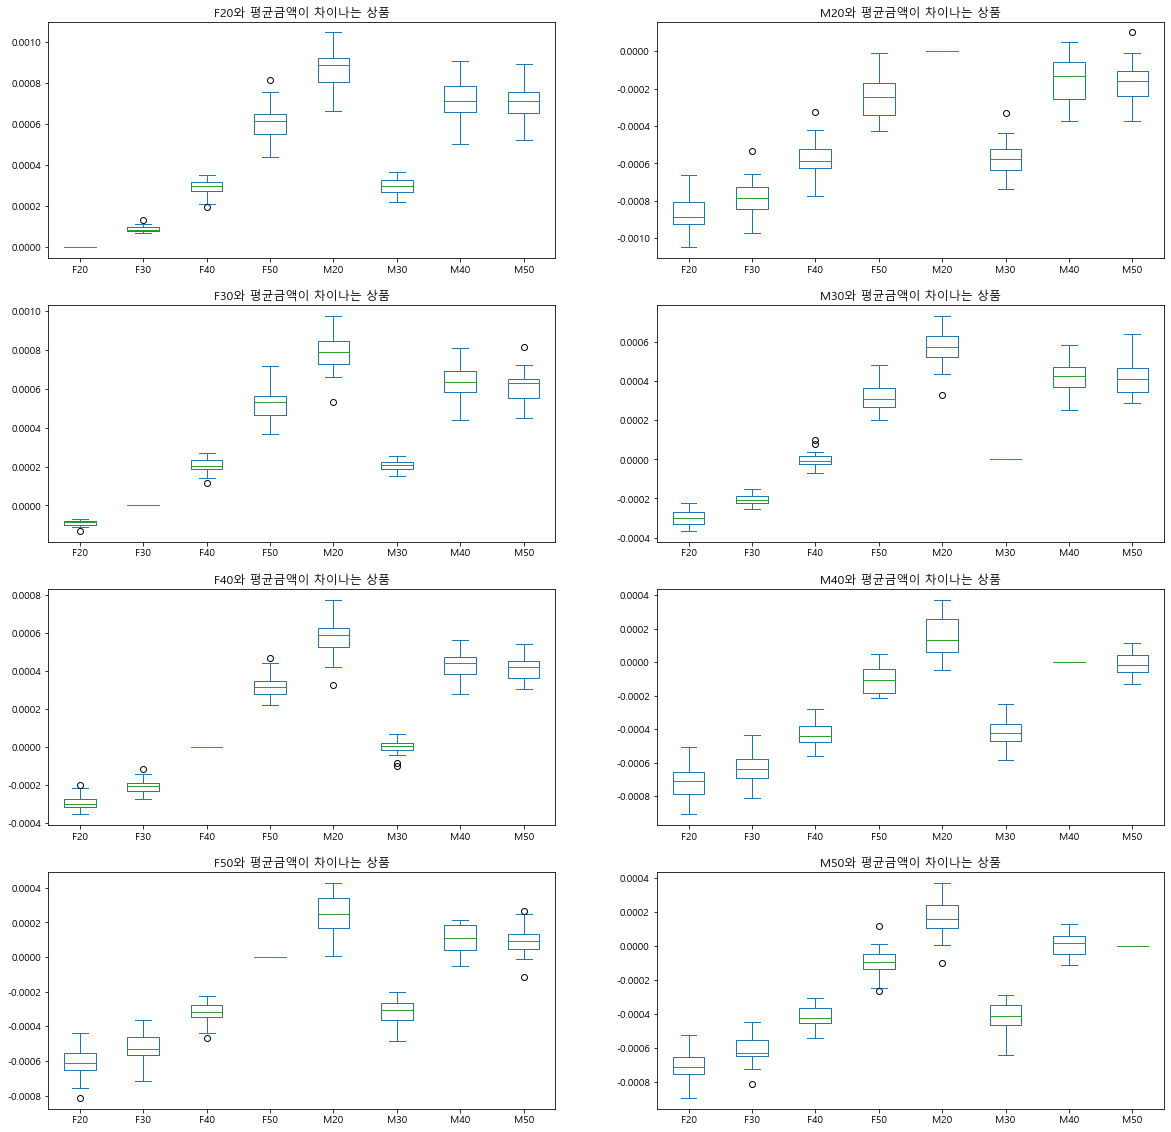

In [46]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for i in range(8):
    ease = part_nm_eda.sub(part_nm_eda[part_nm_eda.columns[i]], axis=0)
    ease.loc['q1'], ease.loc['q3'] = ease.quantile(0.25, axis=0), ease.quantile(0.75, axis=0)
    ease.loc['lower'] = ease.loc['q1']-1.5*(ease.loc['q3']-ease.loc['q1'])
    ease.loc['upper'] = ease.loc['q3']+1.5*(ease.loc['q3']-ease.loc['q1'])
    ease['diff'] = (ease < ease.loc['lower']).sum(axis=1) + (ease > ease.loc['upper']).sum(axis=1)
    part_nmset.update(ease.query('diff>=1').index.tolist())
    ease.iloc[:-4, :-1].plot.box(title=f'{part_nm_eda.columns[i]}와 평균금액이 차이나는 상품', ax=ax[i%4, i//4])

In [47]:
# Outlier 확인
part_nmset

{'남성정장스포츠',
 '로얄부띠끄',
 '명품잡화',
 '생식품',
 '아동',
 '아동,스포츠',
 '아동문화',
 '여성의류파트',
 '여성정장',
 '영라이브',
 '영캐릭터',
 '영플라자',
 '케주얼,구두,아동',
 '패션잡화'}

In [48]:
# Feature Engineering에 추가한다.
# eda.groupby('part_nm')['str_nm'].nunique().loc[part_nmset]
# eda.groupby('part_nm')['goodcd'].nunique().loc[part_nmset]
# eda.groupby('part_nm')['brd_nm'].nunique().loc[part_nmset]
# eda.groupby('part_nm')['corner_nm'].nunique().loc[part_nmset]
# eda.groupby('part_nm')['pc_nm'].nunique().loc[part_nmset]
# eda.groupby('part_nm')['team_nm'].nunique().loc[part_nmset]
# eda.groupby('part_nm')['buyer_nm'].nunique().loc[part_nmset]
# eda.groupby('part_nm')['import_flg'].nunique().loc[part_nmset]
# eda.groupby('part_nm')['inst_mon'].nunique().loc[part_nmset]

- **[buyer_nm와 group]**

In [49]:
min_customer = eda.custid.nunique()*0.05
count_customer = eda.drop_duplicates(['custid', 'buyer_nm']).buyer_nm.value_counts()
satisfy_customer = set(count_customer[count_customer>min_customer].index)

In [50]:
buyer_nm = eda.query('buyer_nm in @satisfy_customer')

# group별 고객수, buyer_nm수 반영
buyer_nm_eda = pd.pivot_table(buyer_nm, index='buyer_nm', columns='group', values='net_amt', 
                         aggfunc=np.size, fill_value=0, margins=True)
buyer_nm_eda = buyer_nm_eda.divide(buyer_nm_eda['All'], axis=0)
buyer_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('group').size().T
buyer_nm_eda = buyer_nm_eda.divide(buyer_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]

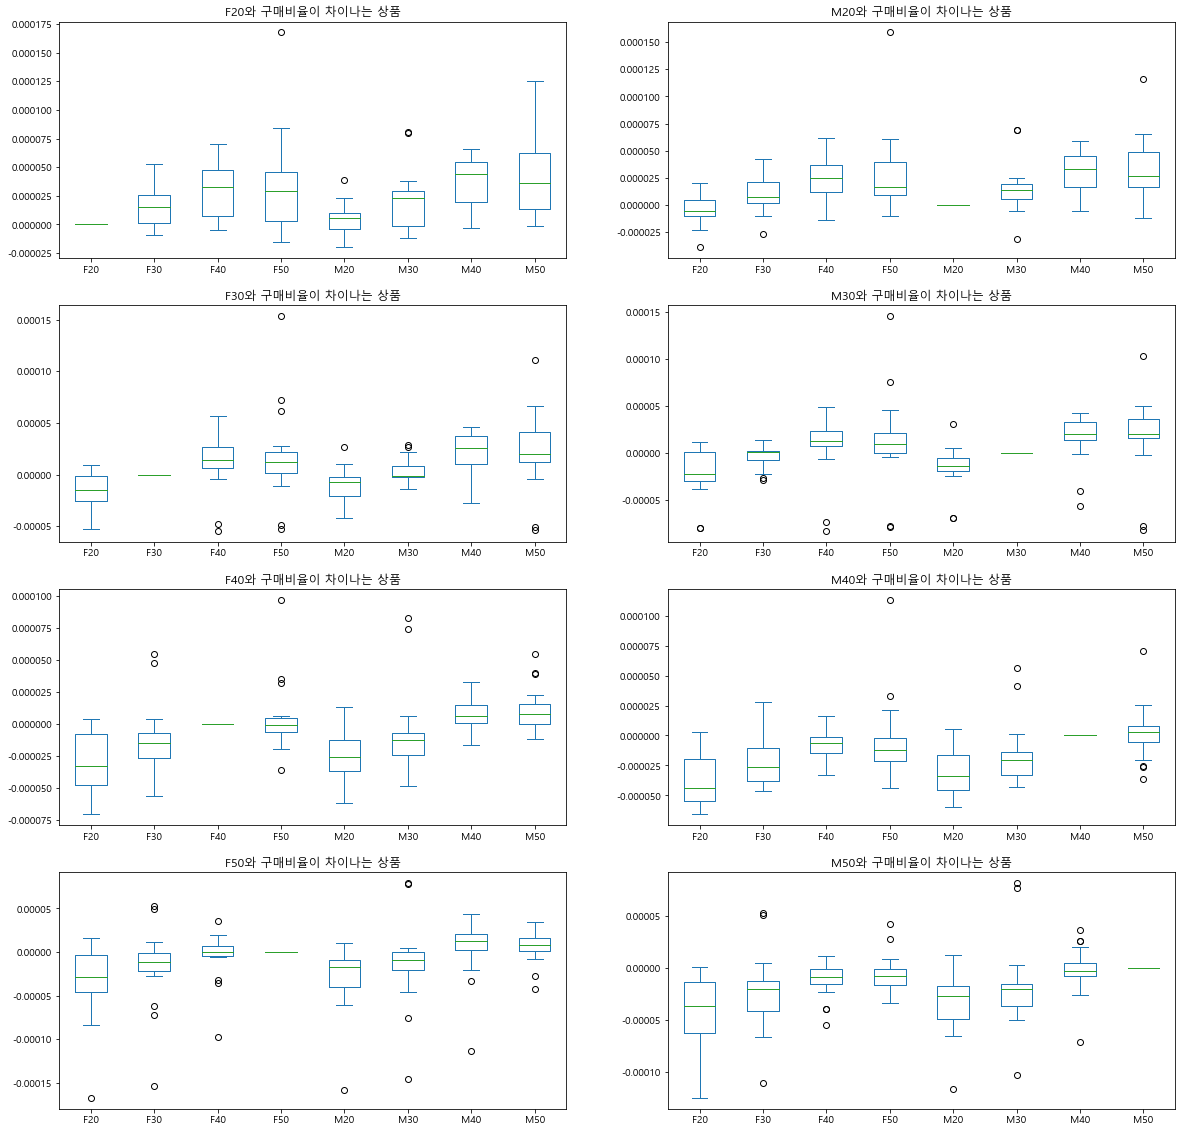

In [51]:
buyer_nmset = set()

fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for i in range(8):
    ease = buyer_nm_eda.sub(buyer_nm_eda[buyer_nm_eda.columns[i]], axis=0)
    ease.loc['q1'], ease.loc['q3'] = ease.quantile(0.25, axis=0), ease.quantile(0.75, axis=0)
    ease.loc['lower'] = ease.loc['q1']-1.5*(ease.loc['q3']-ease.loc['q1'])
    ease.loc['upper'] = ease.loc['q3']+1.5*(ease.loc['q3']-ease.loc['q1'])
    ease['diff'] = (ease < ease.loc['lower']).sum(axis=1) + (ease > ease.loc['upper']).sum(axis=1)
    buyer_nmset.update(ease.query('diff>=1').index.tolist())
    ease.iloc[:-4, :-1].plot.box(title=f'{buyer_nm_eda.columns[i]}와 구매비율이 차이나는 상품', ax=ax[i%4, i//4])

In [52]:
buyer_nm = eda.query('buyer_nm in @satisfy_customer')

# group별 고객수, buyer_nm수 반영
buyer_nm_eda = pd.pivot_table(buyer_nm, index='buyer_nm', columns='group', values='net_amt', 
                         aggfunc=np.mean, fill_value=0, margins=True)
buyer_nm_eda = buyer_nm_eda.divide(buyer_nm_eda['All'], axis=0)
buyer_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('group').size().T
buyer_nm_eda = buyer_nm_eda.divide(buyer_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]

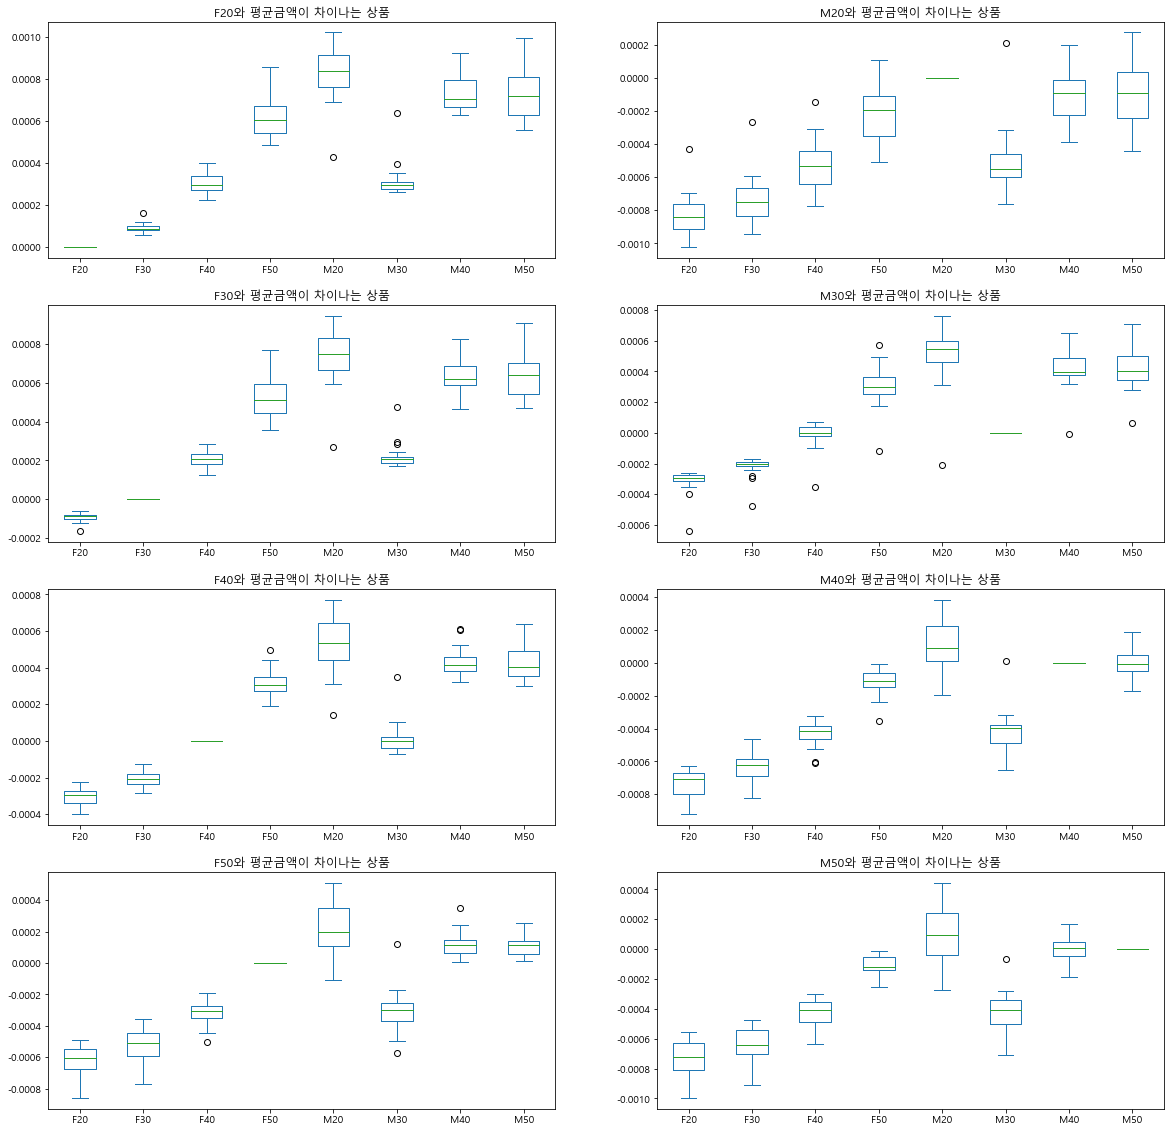

In [53]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
for i in range(8):
    ease = buyer_nm_eda.sub(buyer_nm_eda[buyer_nm_eda.columns[i]], axis=0)
    ease.loc['q1'], ease.loc['q3'] = ease.quantile(0.25, axis=0), ease.quantile(0.75, axis=0)
    ease.loc['lower'] = ease.loc['q1']-1.5*(ease.loc['q3']-ease.loc['q1'])
    ease.loc['upper'] = ease.loc['q3']+1.5*(ease.loc['q3']-ease.loc['q1'])
    ease['diff'] = (ease < ease.loc['lower']).sum(axis=1) + (ease > ease.loc['upper']).sum(axis=1)
    buyer_nmset.update(ease.query('diff>=1').index.tolist())
    ease.iloc[:-4, :-1].plot.box(title=f'{buyer_nm_eda.columns[i]}와 평균금액이 차이나는 상품', ax=ax[i%4, i//4])

In [54]:
# Outlier 확인
buyer_nmset

{'가구',
 '가전',
 '도자기크리스탈',
 '디자이너부띠끄',
 '문화완구',
 '수입명품',
 '유니캐주얼',
 '유아동복',
 '장신구',
 '정장셔츠',
 '침구수예',
 '타운모피'}

In [55]:
# Feature Engineering에 추가한다.
# eda.groupby('buyer_nm')['str_nm'].nunique().loc[buyer_nmset]
# eda.groupby('buyer_nm')['goodcd'].nunique().loc[buyer_nmset]
# eda.groupby('buyer_nm')['brd_nm'].nunique().loc[buyer_nmset]
# eda.groupby('buyer_nm')['corner_nm'].nunique().loc[buyer_nmset]
# eda.groupby('buyer_nm')['pc_nm'].nunique().loc[buyer_nmset]
# eda.groupby('buyer_nm')['part_nm'].nunique().loc[buyer_nmset]
# eda.groupby('buyer_nm')['team_nm'].nunique().loc[buyer_nmset]
# eda.groupby('buyer_nm')['import_flg'].nunique().loc[buyer_nmset]
# eda.groupby('buyer_nm')['inst_mon'].nunique().loc[buyer_nmset]
# eda.groupby('buyer_nm')['inst_mon'].mean().loc[buyer_nmset]
# eda.groupby('buyer_nm')['inst_fee'].mean().loc[buyer_nmset]

### -------------------------------------------------------------------------------------------------------------------------------------------------------------------

### $~~$ Sex 분석

In [56]:
eda['sex'] = eda.group.str[0]
man, woman = dict(), dict()

- **[goodcd와 sex]**

In [57]:
min_customer = eda.custid.nunique()*0.05
count_customer = eda.drop_duplicates(['custid', 'goodcd']).goodcd.value_counts()
satisfy_customer = count_customer[count_customer>min_customer].index

In [58]:
goodcd = eda.query('goodcd in @satisfy_customer')

# 성별별 고객수, goodcd 반영
goodcd_eda = pd.pivot_table(goodcd, index='goodcd', columns='sex', values='net_amt', 
                         aggfunc=np.size, fill_value=0, margins=True)
goodcd_eda = goodcd_eda.divide(goodcd_eda['All'], axis=0)
goodcd_eda.loc['All'] = eda.drop_duplicates('custid').groupby('sex').size().T
goodcd_eda = goodcd_eda.divide(goodcd_eda.loc['All'], axis=1).iloc[:-1, :-1]
goodcd_eda['MORE_FEMALE'] = goodcd_eda['F'] - goodcd_eda['M']  # 양수일 수록 여성구매비율이 높음

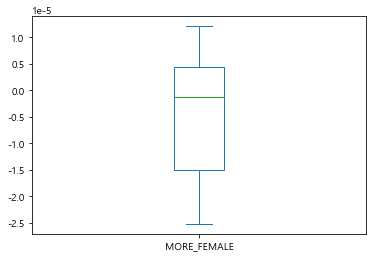

In [59]:
# 대체적으로 남녀의 구매비율은 크게 차이나지 않는다.
goodcd_eda['MORE_FEMALE'].plot.box()
plt.show()

In [60]:
goodcd = eda.query('goodcd in @satisfy_customer')

# 성별별 고객수, goodcd 반영
goodcd_eda = pd.pivot_table(goodcd, index='goodcd', columns='sex', values='net_amt', 
                         aggfunc=np.mean, fill_value=0, margins=True)
goodcd_eda = goodcd_eda.divide(goodcd_eda['All'], axis=0)
goodcd_eda.loc['All'] = eda.drop_duplicates('custid').groupby('sex').size().T
goodcd_eda = goodcd_eda.divide(goodcd_eda.loc['All'], axis=1).iloc[:-1, :-1]
goodcd_eda['MORE_FEMALE'] = goodcd_eda['F'] - goodcd_eda['M']  # 양수일 수록 여성구매비율이 높음

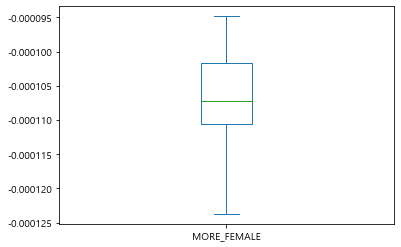

In [61]:
# 대체적으로 남녀의 구매금액은 크게 차이나지 않는다.
goodcd_eda['MORE_FEMALE'].plot.box()
plt.show()

- **[brd_nm와 sex]**

In [62]:
min_customer = eda.custid.nunique()*0.05
count_customer = eda.drop_duplicates(['custid', 'brd_nm']).brd_nm.value_counts()
satisfy_customer = count_customer[count_customer>min_customer].index

In [63]:
brd_nm = eda.query('brd_nm in @satisfy_customer')

# 성별별 고객수, brd_nm 반영
brd_nm_eda = pd.pivot_table(brd_nm, index='brd_nm', columns='sex', values='net_amt', 
                         aggfunc=np.size, fill_value=0, margins=True)
brd_nm_eda = brd_nm_eda.divide(brd_nm_eda['All'], axis=0)
brd_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('sex').size().T
brd_nm_eda = brd_nm_eda.divide(brd_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]
brd_nm_eda['MORE_FEMALE'] = brd_nm_eda['F'] - brd_nm_eda['M']  # 양수일 수록 여성구매비율이 높음

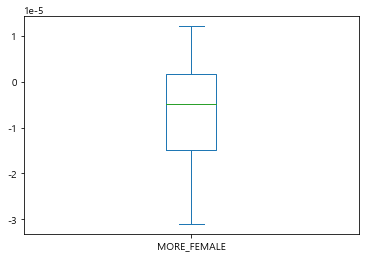

In [64]:
# 대체적으로 남녀의 구매비율은 크게 차이나지 않는다.
brd_nm_eda['MORE_FEMALE'].plot.box()
plt.show()

In [65]:
brd_nm = eda.query('brd_nm in @satisfy_customer')

# 성별별 고객수, brd_nm 반영
brd_nm_eda = pd.pivot_table(brd_nm, index='brd_nm', columns='sex', values='net_amt', 
                         aggfunc=np.mean, fill_value=0, margins=True)
brd_nm_eda = brd_nm_eda.divide(brd_nm_eda['All'], axis=0)
brd_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('sex').size().T
brd_nm_eda = brd_nm_eda.divide(brd_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]
brd_nm_eda['MORE_FEMALE'] = brd_nm_eda['F'] - brd_nm_eda['M']  # 양수일 수록 여성구매비율이 높음

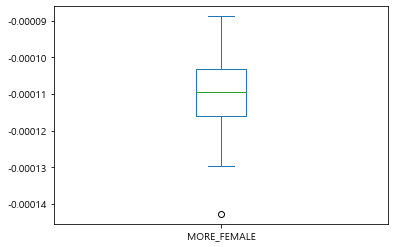

In [66]:
# 대체적으로 남녀의 구매금액은 크게 차이나지 않는다.
brd_nm_eda['MORE_FEMALE'].plot.box()
plt.show()

In [67]:
# 식품은 남성에게서 구매비율이 더 높다.
man['brd_nm'] = {brd_nm_eda['MORE_FEMALE'].sort_values().index[0]}
man['brd_nm']

{'파코라반'}

In [68]:
# brd_nmset에 추가한다.
brd_nmset.update(man['brd_nm'])

- **[corner_nm와 sex]**

In [69]:
min_customer = eda.custid.nunique()*0.05
count_customer = eda.drop_duplicates(['custid', 'corner_nm']).corner_nm.value_counts()
satisfy_customer = set(count_customer[count_customer>min_customer].index)

In [70]:
corner_nm = eda.query('corner_nm in @satisfy_customer')

# 성별별 고객수, corner_nm 반영
corner_nm_eda = pd.pivot_table(corner_nm, index='corner_nm', columns='sex', values='net_amt', 
                         aggfunc=np.size, fill_value=0, margins=True)
corner_nm_eda = corner_nm_eda.divide(corner_nm_eda['All'], axis=0)
corner_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('sex').size().T
corner_nm_eda = corner_nm_eda.divide(corner_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]
corner_nm_eda['MORE_FEMALE'] = corner_nm_eda['F'] - corner_nm_eda['M']  # 양수일 수록 여성구매비율이 높음

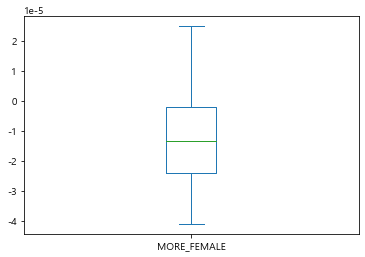

In [71]:
# 대체적으로 남녀의 구매비율은 크게 차이나지 않는다.
corner_nm_eda['MORE_FEMALE'].plot.box()
plt.show()

In [72]:
corner_nm = eda.query('corner_nm in @satisfy_customer')

# 성별별 고객수, corner_nm 반영
corner_nm_eda = pd.pivot_table(corner_nm, index='corner_nm', columns='sex', values='net_amt', 
                         aggfunc=np.mean, fill_value=0, margins=True)
corner_nm_eda = corner_nm_eda.divide(corner_nm_eda['All'], axis=0)
corner_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('sex').size().T
corner_nm_eda = corner_nm_eda.divide(corner_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]
corner_nm_eda['MORE_FEMALE'] = corner_nm_eda['F'] - corner_nm_eda['M']  # 양수일 수록 여성구매비율이 높음

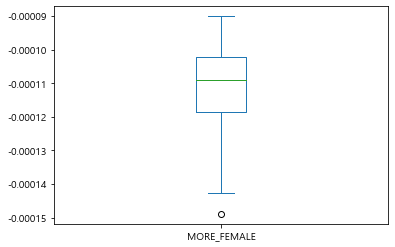

In [73]:
# 대체적으로 남녀의 구매금액은 크게 차이나지 않는다.
corner_nm_eda['MORE_FEMALE'].plot.box()
plt.show()

In [74]:
man['corner_nm'] = {corner_nm_eda['MORE_FEMALE'].sort_values().index[0]}
man['corner_nm']

In [76]:
# # Feature Engineering을 위해 저장한다.
corner_nmset.update(man['corner_nm'])

- **[pc_nm와 sex]**

In [77]:
min_customer = eda.custid.nunique()*0.05
count_customer = eda.drop_duplicates(['custid', 'pc_nm']).pc_nm.value_counts()
satisfy_customer = set(count_customer[count_customer>min_customer].index)

In [78]:
pc_nm = eda.query('pc_nm in @satisfy_customer')

# 성별별 고객수, pc_nm 반영
pc_nm_eda = pd.pivot_table(pc_nm, index='pc_nm', columns='sex', values='net_amt', 
                         aggfunc=np.size, fill_value=0, margins=True)
pc_nm_eda = pc_nm_eda.divide(pc_nm_eda['All'], axis=0)
pc_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('sex').size().T
pc_nm_eda = pc_nm_eda.divide(pc_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]
pc_nm_eda['MORE_FEMALE'] = pc_nm_eda['F'] - pc_nm_eda['M']  # 양수일 수록 여성구매비율이 높음

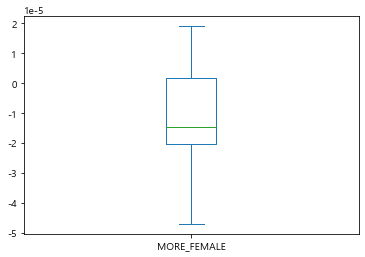

In [79]:
# 대체적으로 남녀의 구매비율은 크게 차이나지 않는다.
pc_nm_eda['MORE_FEMALE'].plot.box()
plt.show()

In [80]:
pc_nm = eda.query('pc_nm in @satisfy_customer')

# 성별별 고객수, pc_nm 반영
pc_nm_eda = pd.pivot_table(pc_nm, index='pc_nm', columns='sex', values='net_amt', 
                         aggfunc=np.mean, fill_value=0, margins=True)
pc_nm_eda = pc_nm_eda.divide(pc_nm_eda['All'], axis=0)
pc_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('sex').size().T
pc_nm_eda = pc_nm_eda.divide(pc_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]
pc_nm_eda['MORE_FEMALE'] = pc_nm_eda['F'] - pc_nm_eda['M']  # 양수일 수록 여성구매비율이 높음

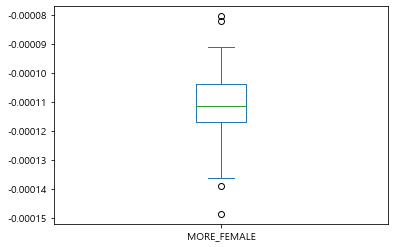

In [81]:
# 대체적으로 남녀의 구매금액은 크게 차이나지 않는다.
pc_nm_eda['MORE_FEMALE'].plot.box()
plt.show()

In [82]:
# # 캐릭터 캐주얼의 평균금액은 남성에게서 높았다.
man['pc_nm'] = {pc_nm_eda['MORE_FEMALE'].sort_values().index[0]}
woman['pc_nm'] = set(pc_nm_eda['MORE_FEMALE'].sort_values().index[-2:])
print(man['pc_nm'], ',', woman['pc_nm'])

{'축산물'} , {'영캐릭터캐쥬얼', '악세사리'}


In [83]:
# Feature Engineering을 위해 저장한다.
pc_nmset.update(man['pc_nm'])
pc_nmset.update(woman['pc_nm'])

- **[part_nm와 sex]**

In [84]:
min_customer = eda.custid.nunique()*0.05
count_customer = eda.drop_duplicates(['custid', 'part_nm']).part_nm.value_counts()
satisfy_customer = set(count_customer[count_customer>min_customer].index)

In [85]:
part_nm = eda.query('part_nm in @satisfy_customer')

# 성별별 고객수, part_nm 반영
part_nm_eda = pd.pivot_table(part_nm, index='part_nm', columns='sex', values='net_amt', 
                         aggfunc=np.size, fill_value=0, margins=True)
part_nm_eda = part_nm_eda.divide(part_nm_eda['All'], axis=0)
part_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('sex').size().T
part_nm_eda = part_nm_eda.divide(part_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]
part_nm_eda['MORE_FEMALE'] = part_nm_eda['F'] - part_nm_eda['M']  # 양수일 수록 여성구매비율이 높음

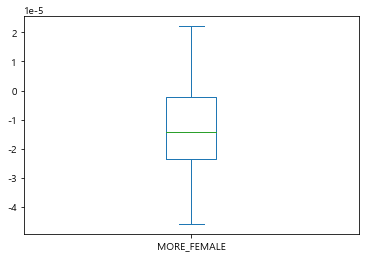

In [86]:
# 대체적으로 남녀의 구매비율은 크게 차이나지 않는다.
part_nm_eda['MORE_FEMALE'].plot.box()
plt.show()

In [87]:
part_nm = eda.query('part_nm in @satisfy_customer')

# 성별별 고객수, part_nm 반영
part_nm_eda = pd.pivot_table(part_nm, index='part_nm', columns='sex', values='net_amt', 
                         aggfunc=np.mean, fill_value=0, margins=True)
part_nm_eda = part_nm_eda.divide(part_nm_eda['All'], axis=0)
part_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('sex').size().T
part_nm_eda = part_nm_eda.divide(part_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]
part_nm_eda['MORE_FEMALE'] = part_nm_eda['F'] - part_nm_eda['M']  # 양수일 수록 여성구매비율이 높음

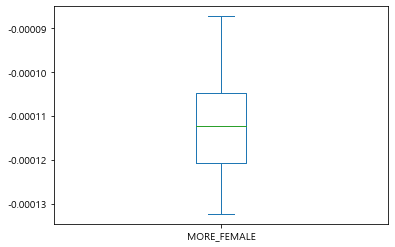

In [88]:
# 대체적으로 남녀의 구매금액은 크게 차이나지 않는다.
part_nm_eda['MORE_FEMALE'].plot.box()
plt.show()

- **[buyer_nm와 sex]**

In [89]:
min_customer = eda.custid.nunique()*0.05
count_customer = eda.drop_duplicates(['custid', 'buyer_nm']).buyer_nm.value_counts()
satisfy_customer = set(count_customer[count_customer>min_customer].index)

In [90]:
buyer_nm = eda.query('buyer_nm in @satisfy_customer')

# 성별별 고객수, buyer_nm 반영
buyer_nm_eda = pd.pivot_table(buyer_nm, index='buyer_nm', columns='sex', values='net_amt', 
                         aggfunc=np.size, fill_value=0, margins=True)
buyer_nm_eda = buyer_nm_eda.divide(buyer_nm_eda['All'], axis=0)
buyer_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('sex').size().T
buyer_nm_eda = buyer_nm_eda.divide(buyer_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]
buyer_nm_eda['MORE_FEMALE'] = buyer_nm_eda['F'] - buyer_nm_eda['M']  # 양수일 수록 여성구매비율이 높음

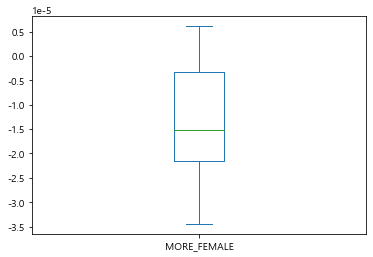

In [91]:
# 대체적으로 남녀의 구매비율은 크게 차이나지 않는다.
buyer_nm_eda['MORE_FEMALE'].plot.box()
plt.show()

In [92]:
buyer_nm = eda.query('buyer_nm in @satisfy_customer')

# 성별별 고객수, buyer_nm 반영
buyer_nm_eda = pd.pivot_table(buyer_nm, index='buyer_nm', columns='sex', values='net_amt', 
                         aggfunc=np.mean, fill_value=0, margins=True)
buyer_nm_eda = buyer_nm_eda.divide(buyer_nm_eda['All'], axis=0)
buyer_nm_eda.loc['All'] = eda.drop_duplicates('custid').groupby('sex').size().T
buyer_nm_eda = buyer_nm_eda.divide(buyer_nm_eda.loc['All'], axis=1).iloc[:-1, :-1]
buyer_nm_eda['MORE_FEMALE'] = buyer_nm_eda['F'] - buyer_nm_eda['M']  # 양수일 수록 여성구매비율이 높음

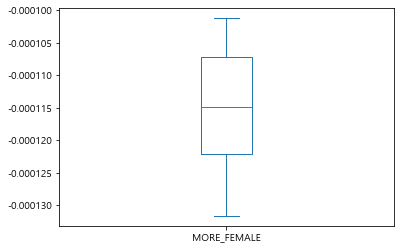

In [93]:
# 대체적으로 남녀의 구매금액은 크게 차이나지 않는다.
buyer_nm_eda['MORE_FEMALE'].plot.box()
plt.show()

### Save Data

In [94]:
# with open(path+'/Frequency_encoding.pkl', 'wb') as f:
#     pickle.dump((fe_sales_dayofweek, fe_str_nm, fe_pc_nm, fe_part_nm, fe_team_nm, fe_buyer_nm), f)

with open(path+'/FE_group.pkl', 'wb') as f:
    pickle.dump((goodcdset, brd_nmset, corner_nmset, pc_nmset, part_nmset, buyer_nmset), f)

with open(path+'/DC_sex.pkl', 'wb') as f:
    pickle.dump((man, woman), f)